In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from mpl_toolkits import mplot3d
plt.rcParams['agg.path.chunksize'] = 60000
%matplotlib auto

Using matplotlib backend: TkAgg


In [8]:
addr='/media/gps/Data/Data/09jan/gps_data/data2.txt'
data1=pd.read_csv(addr,header=None)
data1.columns=['sat_no','x','y','z','range']
data1=data1.dropna(axis=0)
data1['sat_no']=data1['sat_no'].apply(lambda x: int(x.split(':')[1]))
addr='/media/gps/Data/Data/09jan/gps_data/data.txt'
data2=pd.read_csv(addr,header=None)
data2.columns=['sat_no','x','y','z','range']
data2['sat_no']=data2['sat_no'].apply(lambda x: int(x.split(':')[1]))
data2=data2.dropna(axis=0)
sat_list=np.unique(data2['sat_no'])
data=data1.append(data2)
sat_list=np.unique(data.sat_no)

In [9]:
sat_list

array([ 1,  3,  7,  8,  9, 11, 13, 16, 17, 18, 22, 23, 27, 30])

In [10]:
k=1
specific_sat = data[data.sat_no == sat_list[k]]
sat_x = specific_sat["x"]
sat_y = specific_sat["y"]
sat_z = specific_sat["z"]
fig = plt.figure(figsize=(16,16))
bx = fig.add_subplot(111, projection='3d')
ax=plt.axes(projection='3d')
ax.plot3D(sat_x,sat_y,sat_z,'-',label='satellite '+str(sat_list[k]))
#sat_2=7;

#ax.plot3D(data[data.sat_no==sat_2].x,data[data.sat_no==sat_2].y,data[data.sat_no==sat_2].z,'g',label='satellite '+str(sat_2))
#ax.plot3D(data[data.sat_no==sat_2].x[0:100],data[data.sat_no==sat_2].y[0:100],data[data.sat_no==sat_2].z[0:100],'r*',label='initial_point'+str(sat_2))
ax.plot(sat_x[0:1000],sat_y[0:1000],sat_z[0:1000],'k*',label='initial_point:'+str(sat_list[k]))
plt.title('Satellite NO: '+str(sat_list[k]))
plt.legend()
plt.show()

In [5]:
def file_read(addr):
    with open(addr,'r') as i_file:
        data=i_file.readlines()
    final_data=list();
    for k in data:
        final_data.append(k.strip())
    return final_data
def subframe1_data(addr):
    final_data=file_read(addr);
    parameters_1=dict(
                    {
    'Tow':list(),
     'gps_week':list(),
    'ca_or_p_on_l2':list(),
    'sv_accuracy':list(),
    'sv_health':list(),
    'l2_p_data_flag':list(),
    't_gd':list(),
    'iodc':list(),
    'af2':list(),
    'af1':list(),
    'afo':list(),
                    });
    for cur_subframe in final_data:
        parameters_1['Tow'].append(int(cur_subframe[30:30+17],2)*6)
        
    return parameters_1

def subframe2_data(addr):
    final_data=file_read(addr)
    paramters_2=dict({
                    'Tow':list(),
                    'sqrt_A':list(),
                    'delta_n':list(),
                    'Toe':list(),
                    'Mo':list(),
                    'e' : list(),
                    'w' : list(),
                    'C_us' : list(),
                    'C_uc' : list(),
                    'C_rs' : list(),  
                    'iode_sf2':list(),
                    'Aodo':list()
                    });
    for k in range(len(final_data)):
        paramters_2['Tow'].append(int(final_data[k][30:30+17],2)*6)
        paramters_2['sqrt_A'].append(int(final_data[k][226:226+8]+final_data[k][240:240+24],2)*pow(2,-19))
        paramters_2['delta_n'].append(int(final_data[k][90:90+16],2)*pow(2*np.pi,-43))
        paramters_2['Toe'].append(int(final_data[k][270:270+16],2)*pow(2,4))
        paramters_2['Mo'].append(int(final_data[k][106+106+8]+final_data[k][120:120+24],2)*pow(2*np.pi,-31))
        paramters_2['e'].append(int(final_data[k][166:166+8]+final_data[k][180+24],2)*pow(2,-33))
        paramters_2['C_us'].append(int(final_data[k][210:210+16],2)*pow(2,-29))
        paramters_2['C_uc'].append(int(final_data[k][150:150+16],2)*pow(2,-29))
        paramters_2['C_rs'].append(int(final_data[k][68:68+16],2)*pow(2,-5))
        paramters_2['iode_sf2'].append(int(final_data[k][60:60+8],2))
        paramters_2['Aodo'].append(int(final_data[k][271:271+5],2)*900)
    return paramters_2

def subframe3_data(addr):
    final_data=file_read(addr)
    parameters_3=dict(
                    {
            'Tow':list(),
            'iode_sf3':list(),
            'C_is':list(),
            'C_ic':list(),
            'i_o':list(),
            'idot':list(),
            'omega':list(),
            'omega_o':list(),
            'omegadot' :list(),
            'C_rc' : list(),   
            });
    for cur_subframe in final_data:
        parameters_3['Tow'].append(int(cur_subframe[30:30+17],2)*6)
        parameters_3['iode_sf3'].append(int(cur_subframe[270:270+8],2))
        parameters_3['C_is'].append(int(cur_subframe[120:120+16],2)*pow(2,-29))
    return parameters_3



In [6]:

data_param=dict()
for sat in sat_list:
    data_param['sat'+str(sat)]=dict()
    for subframe in range(1,6):
        paddr='/media/gps/Data/Data/09jan/gps_data/subframes/sat'+str(sat)
        data_param['sat'+str(sat)]['subframe'+str(subframe)]=dict()       
        if subframe==2:
            file_name='subframe'+str(subframe)+'_file.dat';
            if file_name in os.listdir(paddr):
                addr=paddr+'/'+file_name
                parameters_2=subframe2_data(addr)
                data_param['sat'+str(sat)]['subframe'+str(subframe)]=parameters_2
        if subframe==1:
            file_name='subframe'+str(subframe)+'_file.dat'
            if file_name in os.listdir(paddr):
                addr=paddr+'/'+file_name
                parameters_1=subframe1_data(addr)
                data_param['sat'+str(sat)]['subframe'+str(subframe)]=parameters_1
        if subframe==3:
            file_name='subframe'+str(subframe)+'_file.dat'
            if file_name in os.listdir(paddr):
                addr=paddr+'/'+file_name
                parameters_3=subframe3_data(addr)
                data_param['sat'+str(sat)]['subframe'+str(subframe)]=parameters_3
                

In [7]:
data_param['sat3']['subframe2']['e']
#    kur_time.append((paramters_2['Tow'][-1]-paramters_2['Tow'][0])/3600)

[0.0,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 0.0,
 0.0,
 1.1641532182693481e-10,
 0.0,
 1.1641532182693481e-10,
 0.0,
 0.0,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1641532182693481e-10,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1

In [8]:
kur_time=list()
for k in sat_list:
    a=data_param['sat'+str(k)]['subframe2']['Tow'][-1]-data_param['sat'+str(k)]['subframe2']['Tow'][0]
    kur_time.append(a)

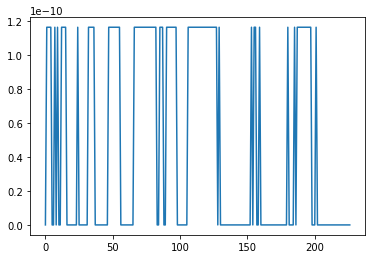

In [9]:
fig = plt.figure()
ax = plt.axes()

x = data_param['sat3']['subframe2']['e']
ax.plot(x);
#plt.stem(sat_list,kur_time)
#plt.xticks(np.arange(min(sat_list), max(sat_list)+1, 1.0))
#plt.yticks(np.arange(min(kur_time), max(kur_time)+1, 1000))

In [18]:
diff_time=([data_param['sat9']['Tow'][k]-data_param['sat9']['Tow'][k-1] for k in range(len(data_param['sat9']['Tow'])-1)])
np.unique(diff_time)

KeyError: 'Tow'